In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Data Directory/crypto-markets.csv',parse_dates=['date'], index_col='date')
data.index=pd.to_datetime(data.index,format='%Y-%m-%d')
print(data)

                    slug symbol          name  ranknow        open  \
date                                                                 
2013-04-28       bitcoin    BTC       Bitcoin        1  135.300000   
2013-04-29       bitcoin    BTC       Bitcoin        1  134.440000   
2013-04-30       bitcoin    BTC       Bitcoin        1  144.000000   
2013-05-01       bitcoin    BTC       Bitcoin        1  139.000000   
2013-05-02       bitcoin    BTC       Bitcoin        1  116.380000   
2013-05-03       bitcoin    BTC       Bitcoin        1  106.250000   
2013-05-04       bitcoin    BTC       Bitcoin        1   98.100000   
2013-05-05       bitcoin    BTC       Bitcoin        1  112.900000   
2013-05-06       bitcoin    BTC       Bitcoin        1  115.980000   
2013-05-07       bitcoin    BTC       Bitcoin        1  112.250000   
2013-05-08       bitcoin    BTC       Bitcoin        1  109.600000   
2013-05-09       bitcoin    BTC       Bitcoin        1  113.200000   
2013-05-10       bit

In [6]:
#intent entity query
response = requests.get("http://localhost:5000/parse",params={"q":"plot graph for bitcoin vs litecoin"})
response=response.json()
entities = response.get("entities")
intent = response.get("intent")
print("Entities:", entities)
print("Intent:", intent)
for i in entities:
    print (i['value'])

Entities: [{'start': 15, 'extractor': 'ner_crf', 'end': 22, 'value': 'bitcoin', 'entity': 'Crypto'}, {'start': 26, 'extractor': 'ner_crf', 'end': 34, 'value': 'litecoin', 'entity': 'Crypto'}]
Intent: {'confidence': 0.307627337058578, 'name': 'PlotCurrencyGraph'}
bitcoin
litecoin


In [4]:
#Attributes of knowledge base
response= data.columns.values.tolist()
print(str(response)[1:-1])

'slug', 'symbol', 'name', 'ranknow', 'open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 'spread'


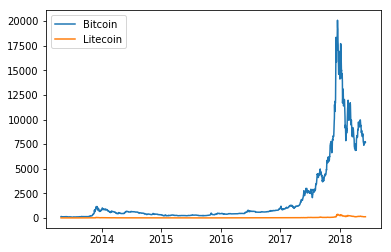

In [7]:
#Graph plotting
for i in entities:
    data1 = data.loc[data['name'] == i['value'].title()]
    plt.plot(data1['high'],label=i['value'].title())
    plt.legend(loc='best')
plt.show()

In [8]:
#highest value
data1 = data.groupby('name')['high'].max()
crypto=str(entities[0]['value']).title()
print(str(data1[crypto]))

20089.0


In [9]:
#Crypto list
response_text = "The list of cryptos currently in my database include "
final_data = data.name.unique()
final_data = str(final_data)
response_text = response_text + final_data[1:-1]
print(response_text)

The list of cryptos currently in my database include 'Bitcoin' 'Ethereum' 'Ripple' ... 'ENTCash' 'Jingtum Tech' 'Aston'


In [14]:
response_text =''
print(data,entities)
for i in entities:
    data1 = data.loc[data['name'] == i['value'].title()]
    print(data1.dtypes) 
    response_text = response_text + str(i['value'].title()) +' last known value to me for the date ' +str(data1[0]['date']) +' is : ' +str(data1[-1]['close']) +"\n"
    print (response_text)
    

                    slug symbol          name  ranknow        open  \
date                                                                 
2013-04-28       bitcoin    BTC       Bitcoin        1  135.300000   
2013-04-29       bitcoin    BTC       Bitcoin        1  134.440000   
2013-04-30       bitcoin    BTC       Bitcoin        1  144.000000   
2013-05-01       bitcoin    BTC       Bitcoin        1  139.000000   
2013-05-02       bitcoin    BTC       Bitcoin        1  116.380000   
2013-05-03       bitcoin    BTC       Bitcoin        1  106.250000   
2013-05-04       bitcoin    BTC       Bitcoin        1   98.100000   
2013-05-05       bitcoin    BTC       Bitcoin        1  112.900000   
2013-05-06       bitcoin    BTC       Bitcoin        1  115.980000   
2013-05-07       bitcoin    BTC       Bitcoin        1  112.250000   
2013-05-08       bitcoin    BTC       Bitcoin        1  109.600000   
2013-05-09       bitcoin    BTC       Bitcoin        1  113.200000   
2013-05-10       bit

KeyError: 0